<a href="https://colab.research.google.com/github/AyeshaAteeqBurney/SentiMix-Hinglish/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries if you don't have them
# pip install pandas scikit-learn

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance

# Load dataset (you can change the URL to any dataset from GitHub)
# For this example, we'll use a CSV dataset related to customer data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=columns)

# Preview the dataset
print(df.head())

# Step 1: Normalize the dataset using Min-Max Scaling
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df.drop(columns=['Outcome'])), columns=df.columns[:-1])

# Add the target outcome column back
normalized_df['Outcome'] = df['Outcome']
print("\nNormalized Data:\n", normalized_df.head())

# Function to calculate Euclidean distance
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2)**2))

# Function to calculate Manhattan distance
def manhattan_distance(row1, row2):
    return np.sum(np.abs(row1 - row2))

# Function to calculate Hamming distance for binary outcomes (0 or 1)
def hamming_distance(row1, row2):
    # If outcomes are the same, return 0, otherwise return 1
    return 0 if row1 == row2 else 1



# KNN Algorithm
def knn_predict(new_data, train_data, k):
    distances = []

    # Loop through each row in the training set
    for index, row in train_data.iterrows():
        dist = euclidean_distance(new_data, row[:-1])  # We use Euclidean here, but you can switch to Manhattan/Hamming
        distances.append((index, dist))

    # Sort based on distance and select top K
    distances = sorted(distances, key=lambda x: x[1])
    nearest_neighbors = distances[:k]

    # Get the majority class from the nearest neighbors
    outcomes = [train_data.iloc[i[0]]['Outcome'] for i in nearest_neighbors]
    prediction = max(set(outcomes), key=outcomes.count)  # Majority vote

    return prediction

# Example usage: Predict if a new customer with these normalized features has diabetes or not
# Sample new data (normalized values for testing)
new_customer = [0.5, 0.75, 0.6, 0.2, 0.3, 0.6, 0.5, 0.7]  # Replace with actual values
new_customer = np.array(new_customer)

# Step 2: Use KNN to predict (K = 3 in this case)
prediction = knn_predict(new_customer, normalized_df, k=3)

print("\nPredicted Outcome for New Customer (1=Diabetes, 0=No Diabetes):", prediction)

# Step 3: Calculate distance metrics between two random customers
customer_1 = normalized_df.iloc[0, :-1].values  # First customer's normalized data
customer_2 = normalized_df.iloc[1, :-1].values  # Second customer's normalized data

# Calculate Euclidean, Manhattan, and Hamming Distances
print("\nEuclidean Distance between Customer 1 and Customer 2:", euclidean_distance(customer_1, customer_2))
print("Manhattan Distance between Customer 1 and Customer 2:", manhattan_distance(customer_1, customer_2))
# Calculate Hamming Distance for the binary outcome
print("Hamming Distance between Customer 1 and Customer 2 Outcomes:", hamming_distance(df.iloc[0]['Outcome'], df.iloc[1]['Outcome']))



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Normalized Data:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.00

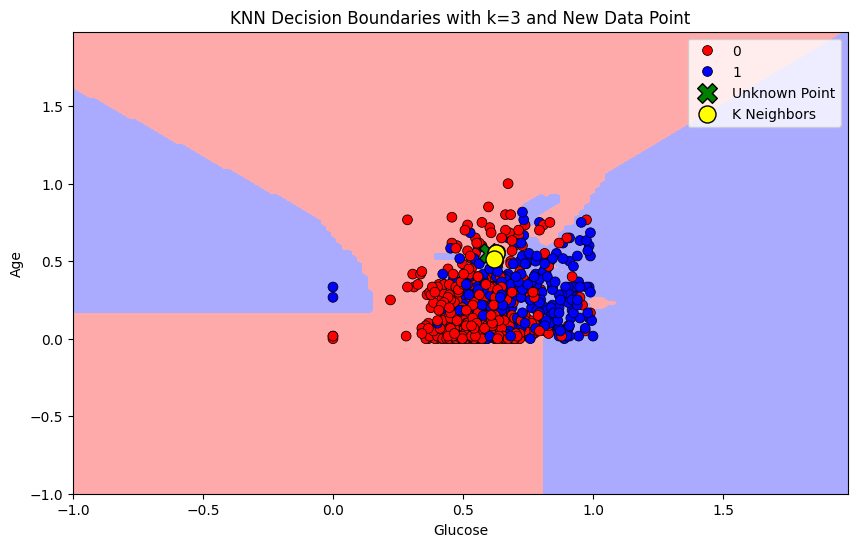

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

# Plot the dataset with KNN decision boundary and highlight the unknown data point
def plot_knn_with_unknown_point(train_data, k, new_data):
    # We will only take two features for visualization (Glucose and Age)
    X = train_data[['Glucose', 'Age']].values
    y = train_data['Outcome'].values

    # Create a mesh of points to plot the decision boundary
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Create the KNN model and fit it
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X, y)

    # Predict the classes for each point in the mesh
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ['#FF0000', '#0000FF']

    # Plot the decision boundary using contour plot
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, edgecolor='k', s=50)

    # Highlight the unknown data point (new customer)
    plt.scatter(new_data[0], new_data[1], color='green', edgecolor='k', s=200, marker='X', label='Unknown Point')

    # Find the k-nearest neighbors to the new data point
    distances, indices = knn_model.kneighbors([new_data])
    nearest_neighbors = X[indices][0]

    # Plot the nearest neighbors
    plt.scatter(nearest_neighbors[:, 0], nearest_neighbors[:, 1], color='yellow', edgecolor='k', s=150, marker='o', label='K Neighbors')

    # Add plot labels and title
    plt.title(f'KNN Decision Boundaries with k={k} and New Data Point')
    plt.xlabel('Glucose')
    plt.ylabel('Age')
    plt.legend()
    plt.show()

# Example new data point (unknown customer with normalized Glucose and Age values)
new_customer_point = [0.6, 0.55]  # These are normalized values for testing

# Call the function to plot KNN with the unknown point
plot_knn_with_unknown_point(normalized_df, k=3, new_data=new_customer_point)


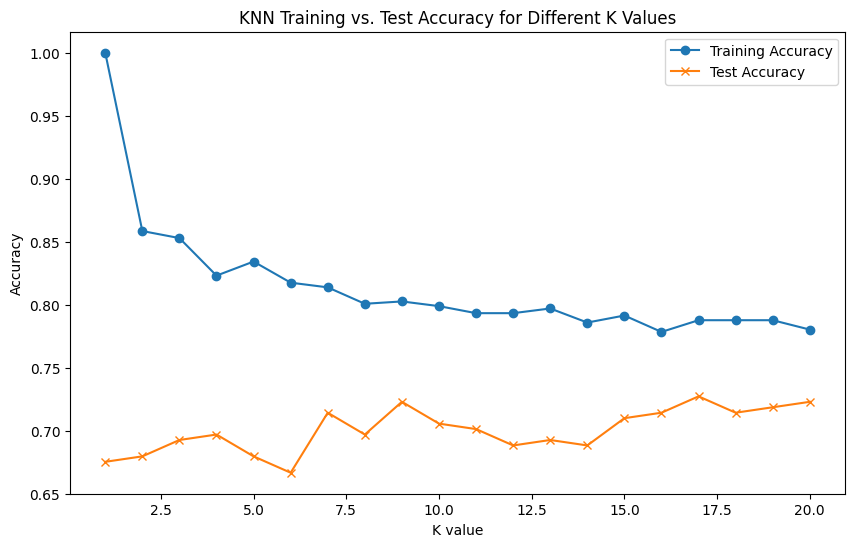

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (replace URL if needed)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=columns)

# Normalize the features using Min-Max Scaling
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df.drop(columns=['Outcome'])), columns=df.columns[:-1])

# Define the target variable (Outcome)
y = df['Outcome']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Empty lists to store accuracies
train_acc = []
test_acc = []

# Test different k values (from 1 to 20)
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Calculate training accuracy
    train_acc.append(knn.score(X_train, y_train))

    # Calculate test accuracy
    test_acc.append(knn.score(X_test, y_test))

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_acc, label='Training Accuracy', marker='o')
plt.plot(k_range, test_acc, label='Test Accuracy', marker='x')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('KNN Training vs. Test Accuracy for Different K Values')
plt.legend()
plt.show()
